In [154]:
import numpy as np 
import matplotlib.pyplot as plt

# the first Step in kmeans 

In [43]:
## Configuration of Kmeans 
Dimensionalty = 2 
k_cluster = 3 
N_observation = 300

In [20]:
# create the data 

# defining three means for centre of cluster 

mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

# create matrix of zeros 
data = np.zeros((N_observation,Dimensionalty))
data[:100,:] = np.random.randn(100,Dimensionalty) + mu1
data[100:200,:] = np.random.randn(100,Dimensionalty) + mu2
data[200:300,:] = np.random.randn(100,Dimensionalty) + mu3

#create liste with differente element 
Y = np.array([0]*100 + [1] * 100 + [2] * 100)
         

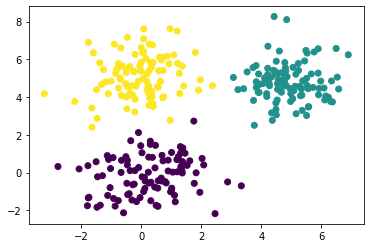

In [21]:
# visualisation the data 

# plt scater plot ( x axis , y axis , c= target )
plt.scatter(data[:,0],data[:,1], c= Y)


In [31]:
# how to get back a D sized vector when takin the mean 
# the mean of the two column 
data.mean(axis=0)

array([1.70657568, 3.2654304 ])

In [36]:
# find the means of each cluster 
means = np.zeros((k_cluster,Dimensionalty))
# calculate the mean of each col 
means[0,:] = data[Y==0].mean(axis = 0)
means[1,:] = data[Y==1].mean(axis = 0)
means[2,:] = data[Y==2].mean(axis = 0)

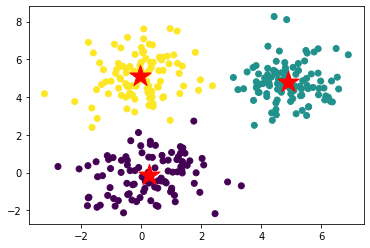

In [37]:
# plot the means with the data 
plt.scatter(data[:,0],data[:,1], c= Y)
plt.scatter(means[:,0], means[:,1], s = 500, c= "red" , marker= "*")

# the Second Step in kmeans 

In [41]:
Y = np.zeros(N_observation)

In [47]:
for i in range(N_observation):
    closest_k = -1
    #initialise to infinite
    min_dist = float("inf")
    for k in range(k_cluster):
        # the square euclidience distance 
        d = (data[i] - means[k]).dot(data[i]- means[k])
        if d < min_dist:
            min_dist= d 
            closest_k = k
    Y[i] = closest_k

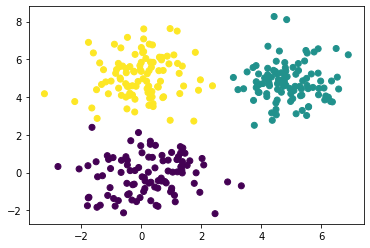

In [48]:
# visualisation 
plt.scatter(data[:,0],data[:,1],c = Y)

#  implementaion of Kmeans 

In [146]:
Dimensionalty = 2 
k_cluster = 3 
N_observation = 300

In [147]:
# create the data 

# defining three means for centre of cluster 

mu1 = np.array([0,0])
mu2 = np.array([5,5])
mu3 = np.array([0,5])

# create matrix of zeros 
data = np.zeros((N_observation,Dimensionalty))
data[:100,:] = np.random.randn(100,Dimensionalty) + mu1
data[100:200,:] = np.random.randn(100,Dimensionalty) + mu2
data[200:300,:] = np.random.randn(100,Dimensionalty) + mu3

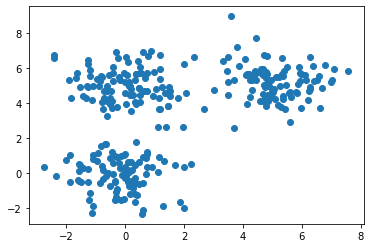

In [148]:
# visualisation of our data set 

# plt scater plot ( x axis , y axis , c= target )
plt.scatter(data[:,0],data[:,1])

In [149]:
# initialisation 
# random assign the centers but for good kmeans we must apply it with more 
cluster_centers = np.zeros((k_cluster,Dimensionalty))
for k in range(k_cluster):
    i = np.random.choice(N_observation)
    cluster_centers[k] = data[i]

In [150]:
cluster_centers

array([[ 0.48084081,  0.6482288 ],
       [ 5.37239263,  4.22436293],
       [ 1.98895512, -1.96493267]])

In [137]:
# kmeans Loop 
max_iteration = 20 # for stop when it converge 
cluster_identities = np.zeros(N_observation)
saved_cluster_identities = []
for i in range(max_iteration):
    old_cluster_identites = cluster_identities.copy()
    saved_cluster_identities.append(old_cluster_identites)
    
    # step 1 determine the cluster identite
    for n in range(N_observation):
        closest_k = -1
        min_dist = float("inf")
        for k in range(k_cluster):
            d = (data[n] - cluster_centers[k]).dot(data[n] - cluster_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        cluster_identities[n] = closest_k
    #recalculate the means 
    for k in range(k_cluster):
        cluster_centers[k,:] = data[cluster_identities == k].mean(axis=0)
    # check for the convergence 
    if np.all(cluster_identities == old_cluster_identites ):
        print (f"converged on step {i}")
        break


converged on step 5


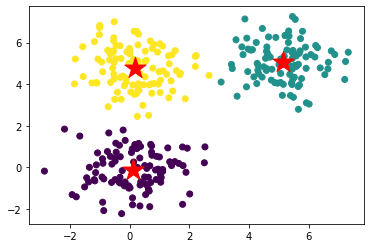

In [140]:
# plot the means with the data 
plt.scatter(data[:,0],data[:,1], c= cluster_identities)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s = 500, c= "red" , marker= "*")

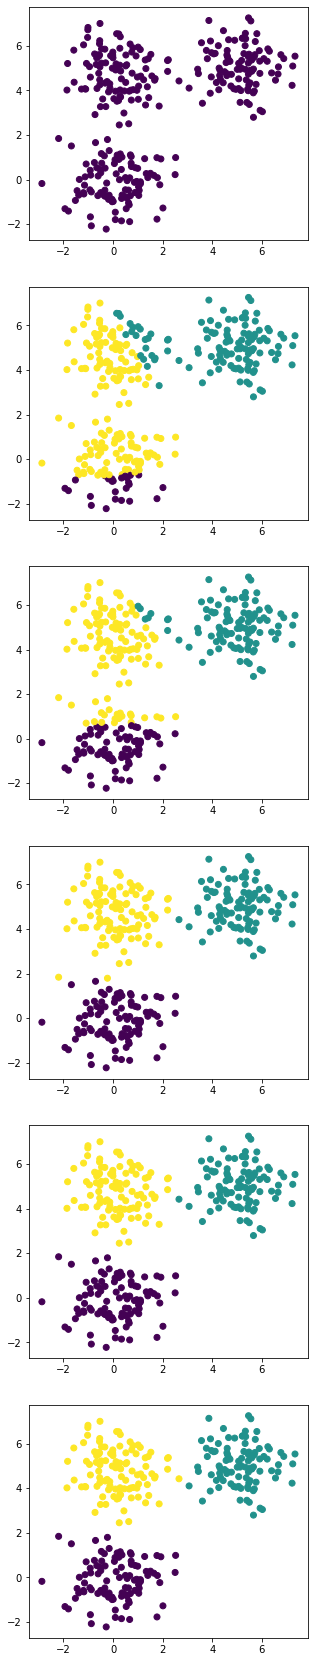

In [141]:
# show the training Progress 
M = len(saved_cluster_identities)

fig ,ax = plt.subplots(figsize = (5,5*M))
for i in range(M):
    # the number of plot, 1 , each plot 
    plt.subplot(M,1,i+1)
    Y= saved_cluster_identities[i]
    plt.scatter(data[:,0],data[:,1], c= Y)

# kmeans with Cost function 

In [151]:
# kmeans Loop 
max_iteration = 20 # for stop when it converge 
cluster_identities = np.zeros(N_observation)
min_distance = np.zeros(N_observation)
costs = []
saved_cluster_identities = []
for i in range(max_iteration):
    old_cluster_identites = cluster_identities.copy()
    saved_cluster_identities.append(old_cluster_identites)
    
    # step 1 determine the cluster identite
    for n in range(N_observation):
        closest_k = -1
        min_dist = float("inf")
        for k in range(k_cluster):
            d = (data[n] - cluster_centers[k]).dot(data[n] - cluster_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        cluster_identities[n] = closest_k
        min_distance [n] = min_dist
    # store the cost 
    costs.append(min_distance.sum())
    #recalculate the means  
    for k in range(k_cluster):
        cluster_centers[k,:] = data[cluster_identities == k].mean(axis=0)
    # check for the convergence 
    if np.all(cluster_identities == old_cluster_identites ):
        print (f"converged on step {i}")
        break


converged on step 4


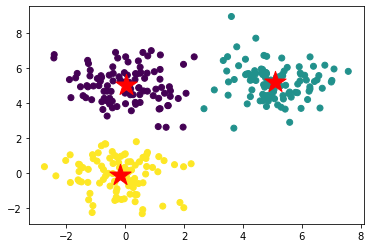

In [152]:
# plot the means with the data 
plt.scatter(data[:,0],data[:,1], c= cluster_identities)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], s = 500, c= "red" , marker= "*")

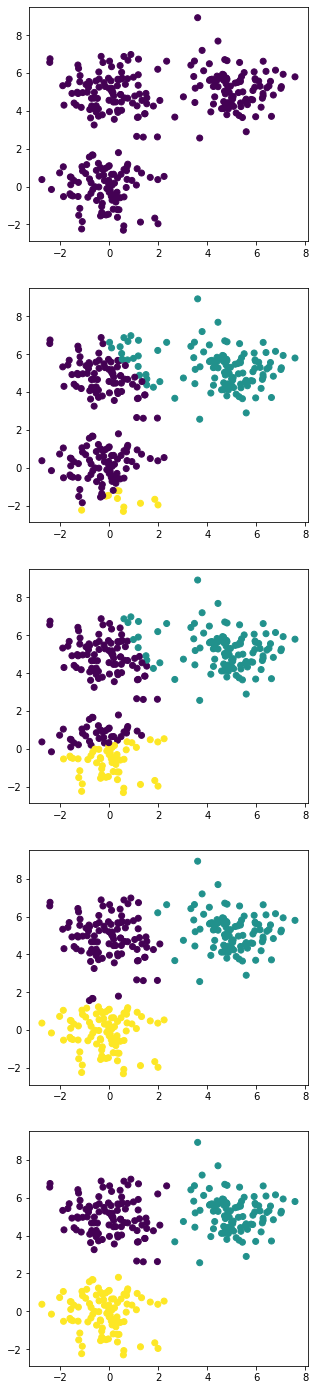

In [162]:
# show the training Progress 
M = len(saved_cluster_identities)

fig ,ax = plt.subplots(figsize = (5,5*M))
for i in range(M):
    # the number of plot, 1 , each plot 
    plt.subplot(M,1,i+1)
    Y= saved_cluster_identities[i]
    plt.scatter(data[:,0],data[:,1], c= Y)

Text(0.5, 0, 'iterations')

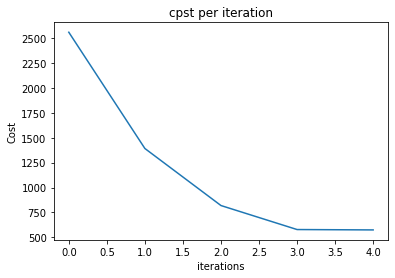

In [161]:
# plot the cost per iteration:
plt.plot(costs)
plt.title("cpst per iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

In [163]:
# we plot the Loss function to be sure that our code is working very
# well and make sure is correct and the result too 